# Exploración y pre-procesamiento de la data

In [1]:
# Importo las librerías iniciales que voy a usar
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Abro los archivos de training y testing que da la competencia
df_test = pd.read_csv('test.csv', index_col=0)
df_train = pd.read_csv('train.csv', index_col=0)

## Procesamiento de "train" dataset

In [3]:
# Exploro el archivo train
print(f'Tamaño del df:', df_train.shape)
print(f'Tipos de datos en las columnas:')
print(df_train.dtypes.value_counts())
#df_train.describe()

Tamaño del df: (1460, 80)
Tipos de datos en las columnas:
object     43
int64      34
float64     3
dtype: int64


In [4]:
# Miro las primeras 10 filas para tener una idea
df_train.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


In [5]:
# Miro que columnas son las que tiene
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

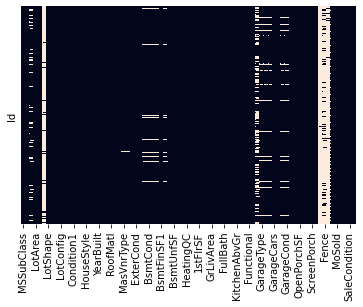

In [6]:
# Chequeo en que columnas hay valores nan
sns.heatmap(df_train.isnull(), yticklabels = False, cbar = False)
df_train.columns[df_train.isna().any()]

In [7]:
# Me fijo cuantos valores nan hay en cada una de esas columnas
columns_with_nan = df_train.isna().sum().sort_values(ascending=False).head(20)
columns_with_nan

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageCond        81
GarageFinish      81
GarageQual        81
GarageYrBlt       81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
RoofMatl           0
dtype: int64

In [8]:
# Tiro aquellas columnas que tienen mas del 60% con nan values
df_train.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1, inplace = True)
df_train.shape

(1460, 76)

In [9]:
# Chequeo si hay rows que tengan muchos nan values
df_train.isnull().sum(axis=1).sort_values(ascending=False)
# las rows que tienen nan values solo tienen 11 nan de 76 values que pueden tener
# no elimino ninguna

Id
521     11
706     11
534     11
1219    11
1012    11
        ..
512      0
511      0
1112     0
509      0
1163     0
Length: 1460, dtype: int64

In [10]:
# Llenos las 15 columnas que tienen valores nan

# Para eso defino una función que después puedo volver a usar
def lleno_nan(df):
    ''' Completa los valores nan de un dataframe,
    si la columna es numérica le coloca la media y si es categórica la moda'''
    columns_with_nan = df.columns[df.isna().any()]
    for x in columns_with_nan:
        if df[x].dtype == int or df[x].dtype == float:
            df[x] = df[x].fillna(df[x].mean())
        else:
            df[x] = df[x].fillna(df[x].mode()[0])
    return df

df_train = lleno_nan(df_train)

## Procesamiento "test" dataset

In [11]:
# Exploro el archivo test
print(f'Tamaño del df:', df_test.shape)
print(f'Tipos de datos en las columnas:')
print(df_test.dtypes.value_counts())

Tamaño del df: (1459, 79)
Tipos de datos en las columnas:
object     43
int64      25
float64    11
dtype: int64


Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType'],
      dtype='object')

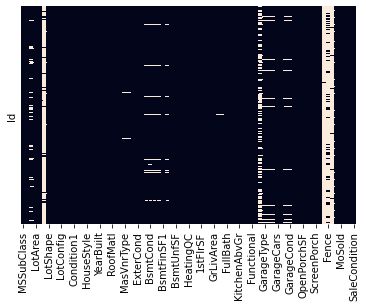

In [12]:
# Chequeo en que columnas hay valores nan
sns.heatmap(df_test.isnull(), yticklabels = False, cbar = False)
df_test.columns[df_test.isna().any()]

In [13]:
# Me fijo cuantos valores nan hay en cada una de esas columnas
df_test.isna().sum().sort_values(ascending=False).head(35)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageFinish      78
GarageYrBlt       78
GarageQual        78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF2         1
BsmtFinSF1         1
BsmtUnfSF          1
TotalBsmtSF        1
Exterior2nd        1
SaleType           1
Exterior1st        1
KitchenQual        1
GarageArea         1
GarageCars         1
OverallQual        0
Neighborhood       0
dtype: int64

In [14]:
# Tiro aquellas columnas que tienen mas del 60% con nan values
df_test.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1, inplace = True)
df_test.shape

(1459, 75)

In [15]:
# Lleno los nan values usando la función previamente descripta
df_test = lleno_nan(df_test)

# Chequeo si se llenaron bien
df_test.isna().sum().sort_values(ascending=False).head()

SaleCondition    0
YearRemodAdd     0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
dtype: int64

In [16]:
print(f' Test df format: {df_test.shape} \n Train df format: {df_train.shape}')

 Test df format: (1459, 75) 
 Train df format: (1460, 76)


El train y el test set ya quedaron limpios en principio. Tienen formatos similares.

El test set tiene una columna menos que es el "SalePrice" a predecir.

# Machine-Learning Model

Lo que se quiere predecir es un valor numérico. Para eso tengo variables numéricas y categóricas que describen cada uno de los casos (o entradas de la tabla). No todos los métodos de ML pueden usar una mezcla de tipos de variables. Uno de los más sencillos de abordar es el **RandomForest**. Otra ventaja del **RandomForest** es que no es necesario estandarizar/normalizar los datos numéricos (aunque hacerlo puede llegar a mejorar un poco la predicción).

In [17]:
# junto los dos datasets para procesarlos
final_df = pd.concat([df_train,df_test],axis=0)
# Primero convierto las variables categóricas en dummies
categorical_features = final_df.dtypes[final_df.dtypes == 'object'].index
# Lo hago usando dummies porque el one-hot-encoder de sklearn necesita categorías numéricas
final_df = pd.get_dummies(final_df, columns=categorical_features)

df_train = final_df.iloc[:1460,:]
df_test = final_df.iloc[1460:,:]
# Separo las variables descriptivas de lo que quiero predecir
# Me quedo con todo menos con SalePrice como X
X = df_train.drop(['SalePrice'],axis=1)
# Me quedo solo con SalePrice como y
y = df_train['SalePrice']

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Separo el dataset de training en subsets training y testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) # Mantener el random state me permite replicar resultados

# Comienzo con el Regressor (uso regressor y no classiffier porque la variable a predecir es numérica)
regressor = RandomForestRegressor(random_state=0)
# Fiteo el algoritmo a los subsets de entrenamiento
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [27]:
print(f'Regressor score on training subset:', regressor.score(X_train, y_train))
print(f'Regressor score on testing subset:', regressor.score(X_test, y_test))
from sklearn.metrics import mean_squared_error
y_pred = regressor.predict(X_test)
print(f'RootMeanSquaredError:', np.sqrt(mean_squared_error(y_test, y_pred)))

Regressor score on training subset: 0.9762318425648874
Regressor score on testing subset: 0.8466018734565102
RootMeanSquaredError: 31823.288129924968


Algo predice... es llamativo que los scores son muchos mejores para el modelo inicial que armé pero el modelo de Pablo, que tiene scores similares a estos, queda mejor ubicado en el leaderboard. Puede suceder que las features que yo recorto o saco sean claves para el test set...

In [28]:
# Hiperparameter tunning con Cross-Validation 
# Randomized Search

from sklearn.model_selection import RandomizedSearchCV

# Número de árboles en el bosque
n_estimators = [int(x) for x in np.linspace(start = 500, stop = 5000, num = 10)]
# Número de features a considerar en cada split
max_features = ['auto', 'sqrt']
# Número máximo de niveles por árbol
max_depth = [int(x) for x in np.linspace(50, 500, num = 10)]
max_depth.append(None)
# Número mínimo de muestras necesarias para abrir un nodo
min_samples_split = [2, 5, 10]
# Número mínimo de muestras por nodo
min_samples_leaf = [2, 5, 10]
# Método de selección de muestras para entrenar cada árbol
bootstrap = [True]
# Creación de la grilla random
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Se larga la búsqueda randomizada de hiperparámetros
rf_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=0, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 18.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 34.8min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [50, 100, 150, 200, 250,
                                                      300, 350, 400, 450, 500,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 5, 10],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [500, 1000, 1500, 2000,
                                                         2500, 3000, 3500, 4000,
                                                         4500, 5000]},
                   random_state=0, verbose=2)

In [29]:
print(f'Regressor best params:', rf_random.best_params_)
print(f'Regressor score on training subset:', rf_random.best_estimator_.score(X_train, y_train))
print(f'Regressor score on testing subset:', rf_random.best_estimator_.score(X_test, y_test))
from sklearn.metrics import mean_squared_error
y_pred = rf_random.best_estimator_.predict(X_test)
print(f'RootMeanSquaredError:', np.sqrt(mean_squared_error(y_test, y_pred)))

Regressor best params: {'n_estimators': 2500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 350, 'bootstrap': True}
Regressor score on training subset: 0.9700039196365118
Regressor score on testing subset: 0.8445503189445063
RootMeanSquaredError: 32035.384492487996


In [30]:
# Basandome en los parámetros de la RandomizedSearch seteo parámetros de búsqueda para la GridSearch
# De esta forma optimizo un poco más los hiperparámetros.
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [100, 300, 500],
    'max_features': [100, 200, 'auto'], # Es el 30 y el 60% del total - evito overfitting
    'min_samples_leaf': [2, 4],
    'min_samples_split': [2, 4],
    'n_estimators': [2000, 5000, 10000]
}


# Largamos la GridSearch
grid_search = GridSearchCV(estimator = regressor, param_grid = param_grid, 
                           cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 50.6min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed: 110.9min finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [100, 300, 500],
                         'max_features': [100, 200, 'auto'],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 4],
                         'n_estimators': [2000, 5000, 10000]},
             verbose=2)

In [31]:
print(f'Regressor best params:', grid_search.best_params_)
print(f'Regressor score on training subset:', grid_search.best_estimator_.score(X_train, y_train))
print(f'Regressor score on testing subset:', grid_search.best_estimator_.score(X_test, y_test))
y_pred = grid_search.best_estimator_.predict(X_test)
print(f'RootMeanSquaredError:', np.sqrt(mean_squared_error(y_test, y_pred)))

Regressor best params: {'bootstrap': True, 'max_depth': 100, 'max_features': 100, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 2000}
Regressor score on training subset: 0.9684239523324231
Regressor score on testing subset: 0.8580597251286961
RootMeanSquaredError: 30611.727884129472


/home/mariano/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Fold: 0
RootMeanSquaredError: 21485.854524893562
Score: 0.9111127096021762
Fold: 1
RootMeanSquaredError: 23874.690163276227
Score: 0.8813423252992364
Fold: 2
RootMeanSquaredError: 27226.43698032913
Score: 0.9121285948306334
Fold: 3
RootMeanSquaredError: 20682.101744918553
Score: 0.9219677860874094
Fold: 4
RootMeanSquaredError: 22277.443423928395
Score: 0.9050969971690043
Fold: 5
RootMeanSquaredError: 40065.230304477256
Score: 0.7488557213013103
Fold: 6
RootMeanSquaredError: 29899.4003093133
Score: 0.8606709977384329
Fold: 7
RootMeanSquaredError: 37220.88690981135
Score: 0.7959166755889501
Fold: 8
RootMeanSquaredError: 21575.873392271584
Score: 0.9179641656952724
Fold: 9
RootMeanSquaredError: 34057.844679725546
Score: 0.8628942911207897
********************
Mean Metrics:
RootMeanSquaredError: 27836.576243294483
Score: 0.8717950264433215


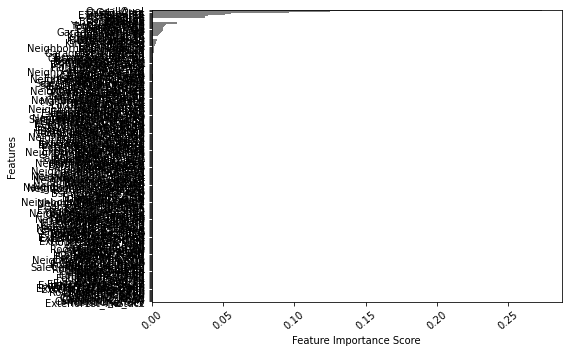

In [20]:
# Una vez que ya tengo los parámetros seteados puedo realizar una cross-validation 
# del modelo con todos los datos de el train set

regressor_final = RandomForestRegressor(bootstrap=True, max_depth=100, max_features=100, 
                                        min_samples_leaf=2, min_samples_split=2, n_estimators=2000,
                                        random_state=0)

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error

def CrossValidator(X, y):
    cv = StratifiedKFold(n_splits=10)
    rmse = []
    features_importances = []
    RMSE = []
    score = []
    for i, (train, test) in enumerate(cv.split(X, y)):
        regressor_final.fit(X.iloc[train], y.iloc[train])
        feature_imp = pd.Series(regressor_final.feature_importances_,index=X.columns).sort_values(ascending=False)
        features_importances.append(feature_imp)
        y_pred = regressor_final.predict(X.iloc[test])
        RMSE.append(np.sqrt(mean_squared_error(y.iloc[test], y_pred)))
        score.append(regressor_final.score(X.iloc[test], y.iloc[test]))
        print(f'Fold:', i)
        print(f'RootMeanSquaredError:', np.sqrt(mean_squared_error(y.iloc[test], y_pred)))
        print(f'Score:', regressor_final.score(X.iloc[test], y.iloc[test]))

    print('*'*20)
    print(f'Mean Metrics:')
    print(f'RootMeanSquaredError:', np.mean(RMSE))
    print(f'Score:', np.mean(score))

    plt.figure(figsize=(8,5))
    feat_impor_mean = pd.Series(sum(features_importances)/len(features_importances)).sort_values(ascending=False)
    sns.barplot(x=feat_impor_mean, y=feature_imp.index, color='grey')
    plt.xticks(rotation=40)
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.tight_layout()
    plt.show()

CrossValidator(X, y)

In [21]:
# Acá me aseguro que el test set tenga las mismas features que el train

features_finals = list(X.columns)

#df_test = pd.get_dummies(df_test, columns=categorical_features)

df_test = df_test[features_finals]

print(f'Train Shape:', X.shape)
print(f'Train Columns:', X.columns)
print(f'Test Shape:', df_test.shape)
print(f'Test Columns:', df_test.columns)
df_test.head()

Train Shape: (1460, 275)
Train Columns: Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=275)
Test Shape: (1459, 275)
Test Columns: Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=275)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,1,0,0,0,0,1,0
1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,0,1,0,0,0,0,1,0


<AxesSubplot:ylabel='Id'>

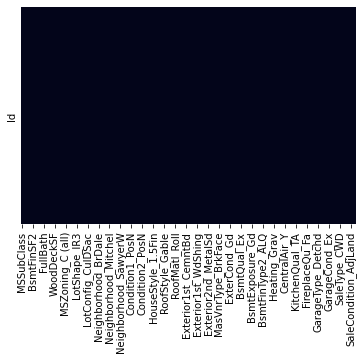

In [22]:
# Chequeo si tienen las mismas columnas y si quedó algún nan dando vueltas
df_test.columns == X.columns
sns.heatmap(df_test.isnull(), yticklabels = False, cbar = False)

In [23]:
# Entro el regresor final con todo el data set
regressor_final.fit(X, y)
# y predigo lo que quiero saber
SalePrice = regressor_final.predict(df_test)

# Le doy el formato que me pide Kaggle
Id = list(df_test.index)

df = pd.DataFrame()
df['Id'] = Id
df['SalePrice'] = SalePrice
df.set_index('Id', drop=True, inplace=True)
df.to_csv('NIS_MM_submission_3.csv')

In [24]:
df = pd.read_csv('NIS_MM_submission_3.csv')
df

,Id,SalePrice
0,1461,127412.389945
1,1462,154813.269417
2,1463,180776.438967
3,1464,184571.482600
4,1465,196724.591538
...,...,...
1454,2915,86462.064340
1455,2916,87542.799610
1456,2917,158000.101590
1457,2918,118681.294419


In [ ]:
df_sample_submission = pd.read_csv('sample_submission.csv')
df_sample_submission

In [ ]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))